In [16]:
from wordle import Wordle, bestSolver, genGuessImpact,genScore

In [17]:
import wordle

In [18]:
import pandas as pd


In [19]:
import matplotlib

In [20]:
testSession = Wordle()


In [21]:
allwordspace = testSession.allWords.copy()

In [22]:
allwordspace.shape

(4277, 1)

In [23]:
allwordspace.drop_duplicates().shape

(4277, 1)

In [9]:
## best initial guess 

In [10]:
bestSolver( allwordspace, allwordspace )

'raise'

In [13]:
allwordspace['guessImpact'] = allwordspace.words.apply( lambda x: genGuessImpact( x, allwordspace ) )

In [17]:
allwordspace.sort_values(by=['guessImpact']).head(10)

,words,guessImpact
3023,raise,112.967267
3872,tarse,122.152677
197,arise,124.847089
202,arose,126.285480
195,ariel,127.211831
2492,nares,127.433481
3327,serai,128.070376
2630,orate,128.788169
1940,irate,129.520926
3043,ratel,131.345569


In [18]:
allwordspace[allwordspace.words=="slate"]

,words,guessImpact
3481,slate,145.027589


In [65]:
testSession = Wordle()
testSession.reset()

In [66]:
guess = "raise"
score_this= "11012"

testSession.getGuess( guess )
testSession.scores.append( score_this )
next_choices = testSession.updateChoices( guess,score_this)

In [60]:
next_choices['guessImpact'] = next_choices.words.apply( lambda x: genGuessImpact( x, next_choices ) )

/tmp/ipykernel_4299/418723028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_choices['guessImpact'] = next_choices.words.apply( lambda x: genGuessImpact( x, next_choices ) )


In [61]:
next_choices.sort_values(by='guessImpact')

,words,guessImpact
3258,scare,4.333333
3364,share,4.333333
3537,snare,4.333333
3602,spare,4.333333
3682,stare,4.333333
3796,sware,4.333333


In [67]:
bestSolver( allwordspace, next_choices )

'chant'

In [68]:
bestSolver( next_choices, next_choices )

'scare'

In [74]:
sum( [int(i) for i in "11012" ]) >=6

False

In [75]:
sum( [int(i) for i in "11012" ]) 

5

In [71]:
genScore("chant","snare")

'00210'

In [72]:
guess = "chant"
score_this= "00210"

testSession.getGuess( guess )
testSession.scores.append( score_this )
next_choices = testSession.updateChoices( guess,score_this)

In [73]:
next_choices

,words
3537,snare


In [62]:
allwordspace['guessImpact'] = allwordspace.words.apply( lambda x: genGuessImpact( x, next_choices ) )

In [63]:
allwordspace.sort_values(by='guessImpact')

,words,guessImpact,stepsNeeded_slate
2718,patch,1.333333,5
4282,watch,1.333333,7
2953,punch,1.333333,5
688,chant,1.333333,3
4353,witch,1.333333,7
...,...,...,...
2045,kissy,6.000000,4
2044,kiosk,6.000000,4
2042,kilim,6.000000,4
2082,kvass,6.000000,4


In [25]:
import swifter

In [29]:

def testSolvingRounds( answer, initial_guess='raise', trials=7): 
    wordleSession= Wordle()
    wordleSession.reset()
    
    wordleSession.answer = answer
    
    guess = initial_guess
    score = ""
    
    for i in range(trials):

        # print(guess)
        wordleSession.getGuess( guess )
        score = wordleSession.getScore( guess ) 
            
        if score == "22222":
            return i+1
    
        choice = wordleSession.updateChoices(guess, score ) 
        if len(choice) == 0:
            return -99999
    
        guess = wordleSession.genHintOptimal()

        
    # print( wordleSession.choiceSpace) 
    return -1
    





In [30]:
testSolvingRounds( "boxer",trials=10)

6

In [31]:
testSolvingRounds( "boxer",initial_guess='slate',trials=10)

5

In [32]:
# bestSolver( allwordspace, allwordspace)

In [33]:
allwordspace['stepsNeeded_slate'] = allwordspace.words.swifter.apply( lambda x: testSolvingRounds( x )) 

Pandas Apply: 100%|███████████████████████| 4277/4277 [1:16:47<00:00,  1.08s/it]


In [34]:
(allwordspace['stepsNeeded_slate']== allwordspace['stepsNeeded_slate'].min()).sum()

1

<Axes: >

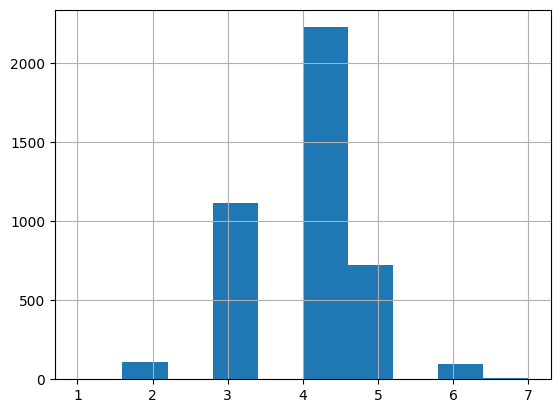

In [35]:
allwordspace['stepsNeeded_slate'].hist()

In [36]:
allwordspace['stepsNeeded_slate'].mean()

3.9081131634323123

In [37]:
allwordspace[allwordspace['stepsNeeded_slate']>6]

,words,stepsNeeded_slate
1358,fight,7
1798,hight,7
1809,hitch,7
1957,jammy,7
2203,lolly,7
2275,mammy,7
4353,witch,7


In [12]:
unsolvables = ['babby','hatch','hitch','might', 	'pappy', 'watch','witch', 'yappy'] 	

In [13]:
for word in unsolvables:
    print( word, testSolvingRounds(word, trials=15,initial_guess='slate'))

babby 7
hatch 7
hitch 7
might 7
pappy 7
watch 7
witch 7
yappy 7


In [26]:
unsolvables = allwordspace[allwordspace['stepsNeeded']== allwordspace['stepsNeeded'].min()].words.values

In [14]:
unsolvables = ['borer', 'boxer', 'coper', 'cover', 'foyer', 'goner', 'hitch',
       'hover', 'jammy', 'lolly', 'mammy', 'might', 'witch']

In [15]:
for word in unsolvables:
    print( word, testSolvingRounds(word, trials=15,initial_guess='raise'))

borer 6
boxer 6
coper 6
cover 6
foyer 6
goner 6
hitch 7
hover 6
jammy 7
lolly 7
mammy 7
might 5
witch 7


In [30]:
allwordspace[allwordspace['stepsNeeded'] > 0]['stepsNeeded'].mean()

3.893058161350844

In [19]:
1 - (allwordspace['stepsNeeded']== allwordspace['stepsNeeded'].min()).sum() / len( allwordspace ) 

0.9969604863221885

In [32]:
allwordspace.to_csv("summary-new-algo.csv",index=False)

In [19]:
allwordspace = pd.read_csv("summary.csv")

In [31]:
allwordspace[allwordspace['stepsNeeded'] == -1]

,words,stepsNeeded
484,borer,-1
504,boxer,-1
844,coper,-1
867,cover,-1
1458,foyer,-1
1621,goner,-1
1809,hitch,-1
1852,hover,-1
1957,jammy,-1
2203,lolly,-1
